Bartlett's Test of Sphericity: Chi-Square = 291.50218009609847, p-value = 0.9091557490897166
KMO Measure of Sampling Adequacy: 0.45084305681528064
Eigenvalues: [1.8462704  1.78790398 1.64340601 1.51671527 1.42651402 1.41238552
 1.37323014 1.27356862 1.23631187 1.15690098 1.06520443 1.04826212
 1.00850232 0.98549242 0.85175454 0.82107384 0.75513727 0.68580156
 0.64748575 0.6167186  0.56057372 0.54118018 0.5266166  0.43753301
 0.40495785 0.37049899]


/Users/fareza_e/miniconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


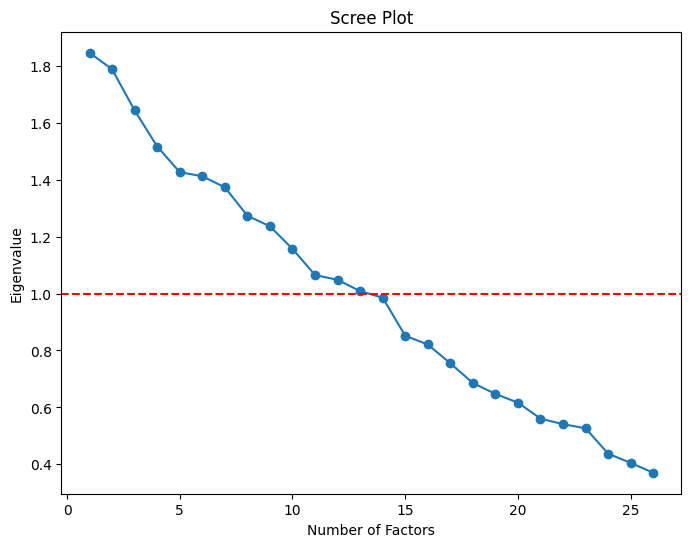

In [4]:
# ! pip install pandas matplotlib factor-analyzer

import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import numpy as np

# example of simulated data for 120 participants 
data = {
    "C1FA4": np.random.randint(5, 7, 120),
    "C1FA3": np.random.randint(4, 7, 120),
    "C1FA2": np.random.randint(4, 7, 120),
    "C1FA8": np.random.randint(4, 6, 120),
    "C1FA6": np.random.randint(4, 6, 120),
    "C1FA1": np.random.randint(3, 7, 120),
    "C1FA5": np.random.randint(3, 6, 120),
    "C1FA7": np.random.randint(3, 6, 120),
    "C1FA9": np.random.randint(3, 5, 120),
    "C5N2": np.random.randint(4, 6, 120),
    "C4E5": np.random.randint(3, 5, 120),
    "C5N1": np.random.randint(3, 6, 120),
    "C5N3": np.random.randint(4, 6, 120),
    "C4E4": np.random.randint(3, 5, 120),
    "C4E2": np.random.randint(4, 6, 120),
    "C4E1": np.random.randint(3, 6, 120),
    "C6I3": np.random.randint(2, 5, 120),
    "C3A1": np.random.randint(3, 7, 120),
    "C2PU3": np.random.randint(1, 4, 120),
    "C2PU4": np.random.randint(1, 3, 120),
    "C2PU2": np.random.randint(2, 5, 120),
    "C2PU1": np.random.randint(1, 4, 120),
    "C3A3": np.random.randint(3, 6, 120),
    "C3A4": np.random.randint(3, 6, 120),
    "C3A5": np.random.randint(4, 7, 120),
    "C3A2": np.random.randint(4, 6, 120),
}

# Create the DataFrame
simulated_data = pd.DataFrame(data)

# Save the DataFrame to a CSV file
simulated_data.to_csv("simulated_50_participants.csv", index=False)

df = pd.DataFrame(data)

# Perform Bartlett's Test of Sphericity
bartlett_chi_square, bartlett_p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett's Test of Sphericity: Chi-Square = {bartlett_chi_square}, p-value = {bartlett_p_value}")

# Perform Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Measure of Sampling Adequacy: {kmo_model}")

# Step 2: Conduct PCA for EFA
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal")
fa.fit(df)

eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:", eigenvalues)

# Plot a Scree Plot to visualize factors 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o")
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.axhline(y=1, color="r", linestyle="--")  
plt.show()